## Homework 02

### Exercise 1
One half percent of the population has a coronavirus and a test is being developed. This test gives a false positive $3\%$ of the time and a false negative $2\%$ of the time. 

1. Find the probability that Luca is positive to the test.
2. Suppose Luca is positive to the test. What is the probability that he has contracted the disease?

### Solution

Given the events
$$
\begin{align}
C &= \text{Luca has contracted the coronavirus} \\
T &= \text{Luca is positive to the test}
\end{align}
$$

we may derive from the exercise description the following probabilities:
$$
\begin{align}
p(C) &= \frac{1}{200} &\text{Probability to be infected}\\
p(T|\not C) &= \frac{3}{100} &\text{Probability of false positive test}\\ 
p(\not T|C) &= \frac{1}{50} &\text{Probability of false negative test}
\end{align}
$$

We may now compute the probability of Luca being positive to the test as
$$
\begin{align}
p(T) &= p(T|\not C)p(\not C) + p(T|C)p(C) &\text{Total Probability}\\
     &= \frac{3}{100} (1 -p(C)) + (1 - p(\not T|C)) \frac{1}{200} &\\
     &= \frac{3}{100} \frac{199}{200} + \frac{49}{50} \frac{1}{200} &\\
     &= \frac{597 + 98}{20000} = \frac{695}{20000} = \frac{139}{4000} = 3.475\% &
\end{align}
$$

While the probability of Luca being infected given that he's passed the test is
$$
\begin{align}
p(C|T) &= \frac{p(T|C)p(C)}{p(T)} &\text{Bayes Theorem}\\
     &= \frac{49}{50}\frac{1}{200}\frac{4000}{139} &\\
     &= \frac{98}{695} \approx 14.1 \% &\\
\end{align}
$$

### Exercise 2

Implement the empirical cumulative distribution function $F_X(x)=$ `cdf(dist, x)` taking as inputs a `pyro.distributions` object `dist`, corresponding to the distribution of $X$, and integer value `x`.

Suppose that $X\sim \mathcal{N}(0,1)$ and plot $F_X(x)$.

### Solution

The definition of **empirical cumulative distribution** requires a finite sample $(x_1,\,\ldots\,,\,x_n)$ from a random variable $X\sim f(x|\theta)$ to be defined, which is not mentioned in the exercise description. Furthermore, assuming that `x` is the single input value fed to the (empirical) cumulative density function, I don't understand why it should be an integer! Given these doubts I'll interpret the exercise as follows:

> Implement a python function which evaluates the empirical cumulative distribution $F_X(x)$ = `ecdf(sample, x)` taking as input a `sample` array of $n$ values sampled from a `pyro.distribution` object, corresponding to the distribution of $X$, and a floating point value `x` where the function is to be evaluated.
>
> Suppose that $X \sim \mathcal{N}(x|\mu=0,\sigma^2=1)$ and plot $F_X(x)$.

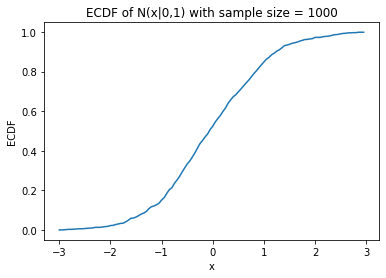

In [13]:
import numpy as np
import torch
import pyro
import matplotlib.pyplot as plt

# Empirical cumulative distribution function
def ecdf(sample, x):
    freq = 0
    for s in sample:
        if s<=x:
            freq = freq+1

    return freq/len(sample)

# Plot ecdf for sample of N(0,1)
# NOTE: this code is highly unefficient!
pyro.set_rng_seed(77)

n = 1000
dist = pyro.distributions.Normal(0,1)
sample = [ pyro.sample("n",dist) for i in range(n) ]

xs = np.arange(-3.0,3.0,0.05)
ys = np.array([ecdf(sample,x) for x in xs])

fig, ax = plt.subplots()
ax.plot(xs,ys)
ax.set(xlabel='x', ylabel='ECDF', title='ECDF of N(x|0,1) with sample size = 1000')
    
plt.show()

### Exercise 3

Suppose the heights of male students are normally distributed with mean $180$ and unknown variance $\sigma^2$. Suppose that $\sigma^2$ is in the range $[22,41]$ with approximately $95\%$ probability and assign to $\sigma^2$ an inverse-gamma $IG(38,1110)$ prior distribution .

1. Empirically verify that the parameters of the inverse-gamma distribution lead to a prior probability of approximately $95\%$ that  $\sigma^2\in[22,41]$.
2. Derive the posterior density of $\sigma^2$ corresponding to the following data: $183, 173, 181, 170, 176, 180, 187, 176, 171, 190, 184, 173, 176, 179, 181, 186$.
Then plot it together with the prior density.
3. Compute the posterior density of the standard deviation $\sigma$.

### Solution

#### 1)

In [34]:
#import torch
#import pyro

n = 10000
dist = pyro.distributions.InverseGamma(38,1110)

sample = [pyro.sample("ig",dist) for i in range(n)]
in_ci = [x for x in sample if 22<=x<=41]
len(in_ci)/len(sample)

0.9449

which is about 95% of the sample.

#### 2)
The posterior for $\sigma^2$ takes the form of an Inverse Gamma distribution:
$\begin{align}
p(\sigma^2|\vec{x},\mu) &= \frac{p(\vec{x}|\mu,\sigma^2)p(\sigma^2)}{p(\vec{x})} \\
&= \frac{1}{p(\vec{x})} \left(\prod_{x_i \in \vec{x}}\mathcal{N}(x_i|\mu,\sigma^2) \right)\text{IG}(\sigma^2|\alpha,\beta) \\
&= \frac{\beta^\alpha}{\Gamma(\alpha)p(\vec{x})\sqrt{(2\pi)^n}}\left(\frac{1}{\sigma^2}\right)^{(\alpha+n)+1}e^{\frac{1}{\sigma^2}\left(\beta + \frac{1}{2} \sum_{x_i \in \vec{x}} (x_i-\mu)^2\right)} \\
&\propto \text{IG}(\sigma^2|\alpha + n, \beta + \frac{1}{2} \sum_{x_i \in \vec{x}} (x_i-\mu)^2)
\end{align}$

Therefore we simply need to compute the values for the parameters and proceed in plotting the densities:

54 2545.0


[Text(0, 0.5, 'density'),
 Text(0.5, 0, '$\\sigma^2$'),
 Text(0.5, 1.0, 'prior vs posterior')]

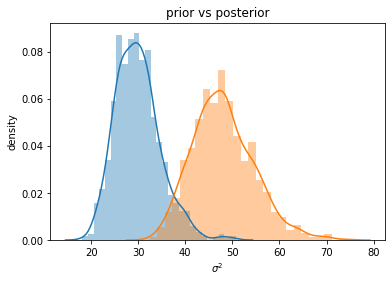

In [42]:
#import numpy as np
#import torch
#import pyro
import seaborn as sns 
#import matplotlib.pyplot as plt

alpha = 38
beta = 1110
mu = 0
x = np.array([183, 173, 181, 170, 176, 180, 187, 176, 171, 190, 184, 173, 176, 179, 181, 186])

alpha2 = alpha + len(x)
beta2 = beta + .5*np.sum(x^2)

print(alpha2, beta2)

prior = pyro.distributions.InverseGamma(alpha,beta)
posterior = pyro.distributions.InverseGamma(alpha2,beta2)

samplesize = 1000
prior_samples = [pyro.sample("ig1",prior) for i in range(samplesize)]
posterior_samples = [pyro.sample("ig2",posterior) for i in range(samplesize)]

xs = np.arange(10,50,0.1)
fig, ax = plt.subplots()
sns.distplot(prior_samples)
sns.distplot(posterior_samples)
ax.set(xlabel='$\sigma^2$', ylabel='density', title='prior vs posterior')



#### 3)
We may transform the posterior found previously by assuming $\sigma^2 = g(\sigma)$, therefore obtaining

$$p(\sigma|\vec{x},\mu) = \text{IG}(\sigma|\alpha + n, \beta + \frac{1}{2} \sum_{x_i \in \vec{x}} (x_i-\mu)^2)\ 2\sigma$$

### Exercise 4

Prove that the Gamma distribution is the conjugate prior distribution for the Exponential likelihood.

### Solution

Given
$$
\begin{align}
X &\sim \text{Exp}(x|\lambda) = \lambda e^{-\lambda x}\\
p(\lambda) &= \text{Gamma}(\lambda|\alpha,\beta) = \frac{\lambda^{\alpha -1}\beta^\alpha e^{-\lambda\beta}}{\Gamma(\alpha)}
\end{align}
$$
the posterior probability takes the form
$$
\begin{align}
p(\lambda|x,\alpha,\beta) &= \frac{\text{Exp}(x|\lambda)p(\lambda)}{p(x)}\\
&=\frac{ \lambda e^{-\lambda x}\lambda^{\alpha -1}\beta^\alpha e^{-\lambda\beta}}{p(x)\Gamma(\alpha)}\\
&= \frac{\lambda^{\alpha}\beta^\alpha e^{-\lambda(\beta + x)}}{p(x)\Gamma(\alpha)}\\
&= \frac{\lambda^{(\alpha+1)-1}(\beta+x)^{(\alpha+1)} e^{-\lambda(\beta + x)}}{\Gamma(\alpha+1)} \frac{\beta^\alpha\Gamma(\alpha+1)}{(\beta+x)^{(\alpha+1)}\Gamma(\alpha)p(x)} \propto \text{Gamma}(\lambda|\alpha+1,\beta+x)\\
\end{align}
$$